<a href="https://colab.research.google.com/github/RahafSh/SDA_DS_FinalProject/blob/main/Data_Science_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Bootcamp** `Final Project` 


##Learning Objectives:

 
* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Looking for Correlations
* Discover and Visualize the Data 
* Prepare the Data for Prophet Model
* Save the Prophet model and Download it 




#Formulate  the problem

The Kingdom of Saudi Arabia has dealt excellently with the Covid-19 situation. So, here we want to explore and extract hidden knowledge to predict the future.

**Loading the dataset from Kaggle website**  
[Click here](https://www.kaggle.com/fahdahalalyan/covid19-ksa?select=critical_cases_ksa_covid19.csv)

In [1]:
#Import libraries & packages 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('ggplot')

#Load Data

In [2]:
#Load the dataset
file_path = '/content/daily_cases_ksa_covid19.csv'

In [3]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,ObjectId,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,Confirmed,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Date
0,1,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1589619600000,Al Sho'bah,C4G90R09,1,0,0,1,0,b8aca67d-4e8a-4242-ba61-c0612fb3b78b,2020-05-16 09:00:00
1,2,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1590656400000,Al Sho'bah,C4G90R09,0,0,1,-1,0,0aecc440-862f-4bd6-9100-db15f18ed360,2020-05-28 09:00:00
2,3,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1591261200000,Al Sho'bah,C4G90R09,1,0,0,1,0,e41e638b-6c66-4583-919b-1735b7247ba9,2020-06-04 09:00:00
3,4,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1591520400000,Al Sho'bah,C4G90R09,1,0,0,1,0,d8016503-2900-4bab-bbb2-1866f86669fa,2020-06-07 09:00:00
4,5,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1592211600000,Al Sho'bah,C4G90R09,1,0,1,0,0,132c1b56-8502-4d31-afc0-66c825c7a97f,2020-06-15 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29922,29923,Al Bashayer,Balqarn,Aseer,C10798G61R06,R06,G61R06,City,Other,c1cf02cc-fa3b-4bd5-b064-65a47cca1b0c,1610627777460,Al Bashayer,C10798G61R06,0,0,1,-1,0,55444fa3-751c-4a7b-a906-c279cd577934,2021-01-14 12:36:17
29923,29924,Al Bashayer,Balqarn,Aseer,C10798G61R06,R06,G61R06,City,Other,c1cf02cc-fa3b-4bd5-b064-65a47cca1b0c,1610714193996,Al Bashayer,C10798G61R06,0,0,1,-1,0,218ce8b6-49d8-403a-b74b-172d2cf37ad7,2021-01-15 12:36:33
29924,29925,Al Bashayer,Balqarn,Aseer,C10798G61R06,R06,G61R06,City,Other,c1cf02cc-fa3b-4bd5-b064-65a47cca1b0c,1610800665122,Al Bashayer,C10798G61R06,0,0,1,-1,0,5219a63f-f976-444a-ba2c-7a118fd37c0d,2021-01-16 12:37:45
29925,29926,Al Bashayer,Balqarn,Aseer,C10798G61R06,R06,G61R06,City,Other,c1cf02cc-fa3b-4bd5-b064-65a47cca1b0c,1611578520156,Al Bashayer,C10798G61R06,1,0,0,1,0,6adba119-72ae-4c26-bde6-58d726d4d10c,2021-01-25 12:42:00


#Data Exploration

In [4]:
#Use the method head() to display the first five rows of the dataframe, but we can spcify a number also like here I choose 2!
df.head(2)

,ObjectId,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,Confirmed,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Date
0,1,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1589619600000,Al Sho'bah,C4G90R09,1,0,0,1,0,b8aca67d-4e8a-4242-ba61-c0612fb3b78b,2020-05-16 09:00:00
1,2,Al Sho'bah,Rafha,Northern Borders,C4G90R09,R09,G90R09,City,GCS,0af06ce2-c55b-4a25-ad66-dc280b06f70b,1590656400000,Al Sho'bah,C4G90R09,0,0,1,-1,0,0aecc440-862f-4bd6-9100-db15f18ed360,2020-05-28 09:00:00


In [5]:
#Use the method tail() to display the last five rows of the dataframe.
df.tail(2)

,ObjectId,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,Confirmed,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Date
29925,29926,Al Bashayer,Balqarn,Aseer,C10798G61R06,R06,G61R06,City,Other,c1cf02cc-fa3b-4bd5-b064-65a47cca1b0c,1611578520156,Al Bashayer,C10798G61R06,1,0,0,1,0,6adba119-72ae-4c26-bde6-58d726d4d10c,2021-01-25 12:42:00
29926,29927,Al Bashayer,Balqarn,Aseer,C10798G61R06,R06,G61R06,City,Other,c1cf02cc-fa3b-4bd5-b064-65a47cca1b0c,1611751424643,Al Bashayer,C10798G61R06,1,0,0,1,0,8458873f-d0a8-4e58-8a64-e28409094d6a,2021-01-27 12:43:44


In [6]:
# Display total of rows and features 
df.shape

(29927, 20)

In [7]:
# Shows column addresses
df.columns

Index(['ObjectId', 'PlaceName_EN', 'GovernorateName_EN', 'RegionName_EN',
       'PLC_CODE', 'REG_CODE', 'GOV_CODE', 'Place_Category', 'DataSource',
       'GlobalID', 'Reportdt', 'Name_Eng', 'Place_Code', 'Confirmed', 'Deaths',
       'Recovered', 'Tested', 'NewAdded', 'GlobalID_1587594607483', 'Date'],
      dtype='object')

#Clean Data

In [8]:
# Data detail for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29927 entries, 0 to 29926
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ObjectId                29927 non-null  int64 
 1   PlaceName_EN            29927 non-null  object
 2   GovernorateName_EN      29927 non-null  object
 3   RegionName_EN           29927 non-null  object
 4   PLC_CODE                29927 non-null  object
 5   REG_CODE                29927 non-null  object
 6   GOV_CODE                29927 non-null  object
 7   Place_Category          29927 non-null  object
 8   DataSource              29927 non-null  object
 9   GlobalID                29927 non-null  object
 10  Reportdt                29927 non-null  int64 
 11  Name_Eng                29927 non-null  object
 12  Place_Code              29927 non-null  object
 13  Confirmed               29927 non-null  int64 
 14  Deaths                  29927 non-null  int64 
 15  Re

In [9]:
# Show details of numerical features
df.describe()

,ObjectId,Reportdt,Confirmed,Deaths,Recovered,Tested,NewAdded
count,29927.000000,2.992700e+04,29927.00000,29927.000000,29927.000000,29927.000000,29927.000000
mean,14964.000000,1.598902e+12,12.29034,0.212918,12.005848,0.071574,0.002506
std,8639.325089,6.426469e+09,51.69547,1.078786,56.892200,49.132371,0.049999
min,1.000000,1.583107e+12,0.00000,0.000000,0.000000,-2941.000000,0.000000
25%,7482.500000,1.594026e+12,1.00000,0.000000,0.000000,-2.000000,0.000000
50%,14964.000000,1.598101e+12,2.00000,0.000000,2.000000,0.000000,0.000000
75%,22445.500000,1.603889e+12,6.00000,0.000000,6.000000,2.000000,0.000000
max,29927.000000,1.611924e+12,2371.00000,35.000000,3165.000000,2124.000000,1.000000


In [10]:
# find the correlation among the columns in the dataframe using pearson method 
df.corr(method ='pearson')

,ObjectId,Reportdt,Confirmed,Deaths,Recovered,Tested,NewAdded
ObjectId,1.000000,-0.002512,-0.120177,-0.129774,-0.105915,-0.000954,-0.001470
Reportdt,-0.002512,1.000000,-0.174051,-0.038650,-0.112835,-0.051626,0.101563
Confirmed,-0.120177,-0.174051,1.000000,0.468480,0.595781,0.352004,-0.008426
Deaths,-0.129774,-0.038650,0.468480,1.000000,0.492071,-0.098825,-0.007415
Recovered,-0.105915,-0.112835,0.595781,0.492071,1.000000,-0.541880,-0.007136
Tested,-0.000954,-0.051626,0.352004,-0.098825,-0.541880,1.000000,-0.000440
NewAdded,-0.001470,0.101563,-0.008426,-0.007415,-0.007136,-0.000440,1.000000


#Missing data values

In [11]:
# Identify missing values
df.isnull().sum()

ObjectId                  0
PlaceName_EN              0
GovernorateName_EN        0
RegionName_EN             0
PLC_CODE                  0
REG_CODE                  0
GOV_CODE                  0
Place_Category            0
DataSource                0
GlobalID                  0
Reportdt                  0
Name_Eng                  0
Place_Code                0
Confirmed                 0
Deaths                    0
Recovered                 0
Tested                    0
NewAdded                  0
GlobalID_1587594607483    0
Date                      0
dtype: int64

In [12]:
# Total number of null values in the whole dataframe
df.isnull().sum().sum()

0

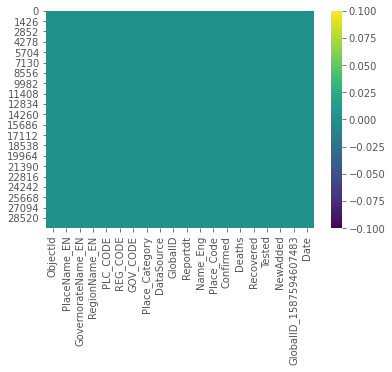

In [13]:
# Check if there is any missing value with plot!
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [14]:
# Drop the whole column, the column will not help in the model!
df.drop(["ObjectId"], axis=1, inplace=True) 

In [15]:
# Drop any duplicates if there are any!
df = df.drop_duplicates()

In [16]:
# Check data shape after dropping duplicated
df.shape

(29927, 19)

#Discover and Visualize Data

Text(0.5, 0, 'Count')

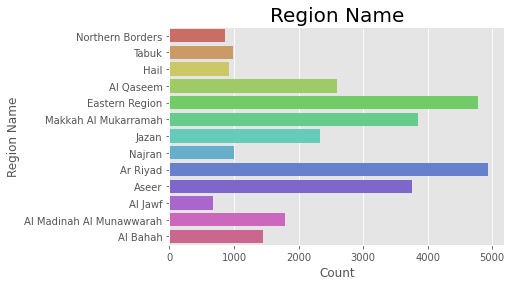

In [17]:
# Plot 1: Visual region names
fig, ax1 = plt.subplots()
sns.countplot(y='RegionName_EN',data=df, palette='hls')
plt.title('Region Name',fontsize=20)
ax1.set_ylabel('Region Name')
ax1.set_xlabel('Count')

Text(0.5, 0, 'Place Category')

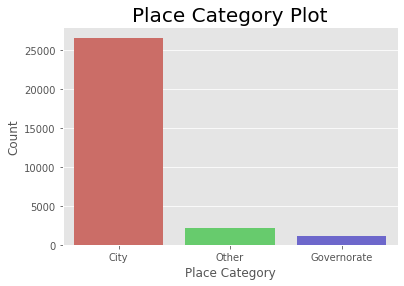

In [18]:
# Plot 2: Visual Place Category
fig, ax1 = plt.subplots()
sns.countplot(x='Place_Category',data=df, palette='hls')
plt.title('Place Category Plot',fontsize=20)
ax1.set_ylabel('Count')
ax1.set_xlabel('Place Category')

Text(0.5, 1.0, 'Regions Name')

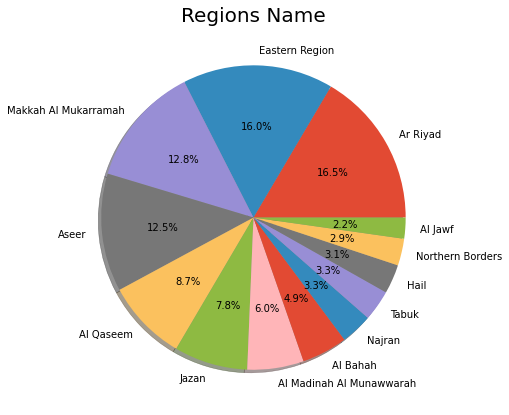

In [19]:
# Plot 3: Visual Regions Pie Chart
P =df.RegionName_EN.value_counts()/df.shape[0]
plt.figure(figsize=[15, 7])
plt.pie(P ,labels=P.index,autopct='%1.1f%%',shadow=True)
plt.title('Regions Name',fontsize=20)

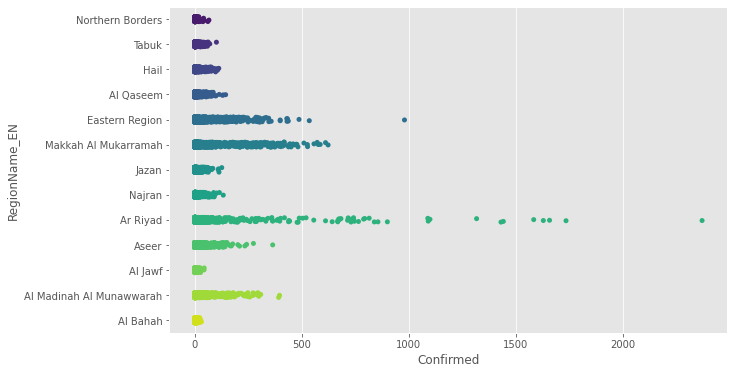

In [20]:
# Plot 4: Visual regions with confirmed cases
plt.figure(figsize=(10, 6))
sns.stripplot(x="Confirmed", y="RegionName_EN", data=df,palette='viridis')

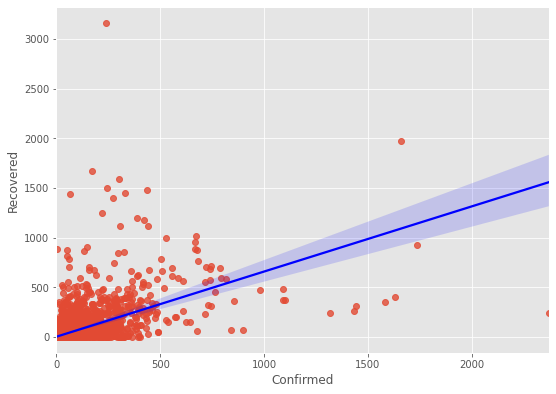

In [21]:
# Plot 5: Visual confiremed & recovered cases
plt.figure(figsize=(30,14))
plt.subplot(231)#subplot to add a subplot to the current figure
sns.regplot(x="Confirmed",y="Recovered", data=df,  line_kws={'color': 'blue'})

# Prophet Model

### Taking the highest confirmed cases as shown above in the plots, to make the forecasting for is Riyadh Region

In [22]:
# Separate Riyadh rows region to make forecasting on it
Rregion = df[df["RegionName_EN"] == 'Ar Riyad']
# Print the first 5 rows
Rregion.head()

,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,Confirmed,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Date
1260,Rafa'i' Al Jamsh,Ad Duwadimi,Ar Riyad,C121G10R01,R01,G10R01,City,GCS,5499ddae-b02e-4473-b69c-dfb3e9e24f80,1589878800000,Rafa'i' Al Jamsh,C121G10R01,1,0,0,1,0,7d2f6fe0-1126-46e5-96f7-741ec9a20c1f,2020-05-19 09:00:00
1261,Rafa'i' Al Jamsh,Ad Duwadimi,Ar Riyad,C121G10R01,R01,G10R01,City,GCS,5499ddae-b02e-4473-b69c-dfb3e9e24f80,1590829200000,Rafa'i' Al Jamsh,C121G10R01,0,0,1,-1,0,574e8e26-d40e-4f7c-871c-c9aa66a8f063,2020-05-30 09:00:00
1262,Rafa'i' Al Jamsh,Ad Duwadimi,Ar Riyad,C121G10R01,R01,G10R01,City,GCS,5499ddae-b02e-4473-b69c-dfb3e9e24f80,1590915600000,Rafa'i' Al Jamsh,C121G10R01,13,0,0,13,0,f466961c-2c2e-4bb9-999e-4fb36de07eee,2020-05-31 09:00:00
1263,Rafa'i' Al Jamsh,Ad Duwadimi,Ar Riyad,C121G10R01,R01,G10R01,City,GCS,5499ddae-b02e-4473-b69c-dfb3e9e24f80,1591174800000,Rafa'i' Al Jamsh,C121G10R01,2,0,0,2,0,a9b44605-12eb-4096-9713-b8690559143e,2020-06-03 09:00:00
1264,Rafa'i' Al Jamsh,Ad Duwadimi,Ar Riyad,C121G10R01,R01,G10R01,City,GCS,5499ddae-b02e-4473-b69c-dfb3e9e24f80,1591347600000,Rafa'i' Al Jamsh,C121G10R01,7,0,0,7,0,d4fc71a7-27cb-43a4-b9a0-0756e13be754,2020-06-05 09:00:00


In [23]:
Rregion[['Date','Time']] = df.Date.str.split(expand=True) 

# Prepare for Prophet
### For prophet to work, we need to change the names of these columns to 'ds' and 'y', so lets just create a new dataframe. 


### And rename the columns as required by fbprophet. Additioinally, fbprophet doesn't like the index to be a datetime...it wants to see 'ds' as a non-index column, so that's why separated above into time from Date.

In [24]:
Rdf = Rregion[['Date','Confirmed']]
Rdf.columns = ['ds','y']
Rdf

,ds,y
1260,2020-05-19,1
1261,2020-05-30,0
1262,2020-05-31,13
1263,2020-06-03,2
1264,2020-06-05,7
...,...,...
28289,2021-01-25,1
28290,2021-01-26,0
28291,2021-01-27,0
28292,2021-01-28,2


In [25]:
# Just to check for 0 values in the y column
Rdf.isin([0]).sum()

ds       0
y     1297
dtype: int64

In [26]:
len(Rdf.index)

4941

In [27]:
Rdf.columns

Index(['ds', 'y'], dtype='object')

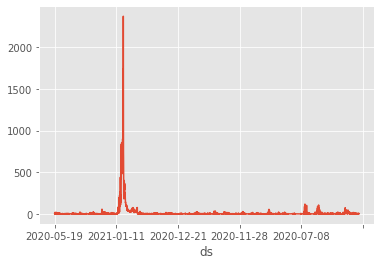

In [28]:
# Plot the data using pandas' plot function
Rdf.set_index('ds').y.plot()

# Running Prophet

### Add some future dates to our dataframe. I want to forecast 6 months into the future, so built a future dataframe with 6 periods. Note the freq='m' inclusion to ensure we are adding 6 months of data.

In [29]:
model = Prophet(changepoint_prior_scale=0.01).fit(Rdf)
future = model.make_future_dataframe(periods=6, freq='m') # period 6 and the frequency of months
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
325,2021-02-28
326,2021-03-31
327,2021-04-30
328,2021-05-31
329,2021-06-30


In [30]:
# To forecast this future data, we need to run it through Prophet's model
fcst = model.predict(future)
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-09,69.293084,-45.987145,188.692331,69.293084,69.293084,0.054769,0.054769,0.054769,0.054769,0.054769,0.054769,0.0,0.0,0.0,69.347853
1,2020-03-13,67.915933,-47.528112,194.606367,67.915933,67.915933,0.156696,0.156696,0.156696,0.156696,0.156696,0.156696,0.0,0.0,0.0,68.072629
2,2020-03-14,67.571645,-56.458344,186.774596,67.571645,67.571645,-0.616591,-0.616591,-0.616591,-0.616591,-0.616591,-0.616591,0.0,0.0,0.0,66.955055
3,2020-03-15,67.227357,-52.513413,193.946342,67.227357,67.227357,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,0.0,0.0,0.0,65.844337
4,2020-03-16,66.883070,-59.597841,188.021808,66.883070,66.883070,0.054769,0.054769,0.054769,0.054769,0.054769,0.054769,0.0,0.0,0.0,66.937838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021-02-28,1.863021,-113.828077,121.066078,0.968618,2.713327,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,0.0,0.0,0.0,0.480000
326,2021-03-31,1.227641,-119.599158,118.836470,-1.611886,4.057329,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,0.0,0.0,0.0,1.073497
327,2021-04-30,0.612757,-125.978038,120.357664,-4.807280,5.793617,0.156696,0.156696,0.156696,0.156696,0.156696,0.156696,0.0,0.0,0.0,0.769452
328,2021-05-31,-0.022623,-119.638334,117.704966,-8.284950,8.472864,0.054769,0.054769,0.054769,0.054769,0.054769,0.054769,0.0,0.0,0.0,0.032145


In [31]:
# look at yhat, yhat_lower and yhat_upper
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
325,2021-02-28,0.480000,-113.828077,121.066078
326,2021-03-31,1.073497,-119.599158,118.836470
327,2021-04-30,0.769452,-125.978038,120.357664
328,2021-05-31,0.032145,-119.638334,117.704966
329,2021-06-30,-0.791651,-116.543805,120.972401


# Plotting Prophet Results

### Prophet has a plotting mechanism called `plot`. This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

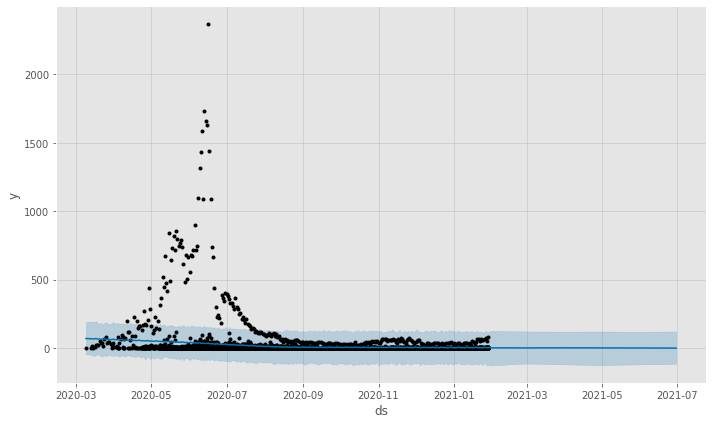

In [32]:
fig = model.plot(fcst);

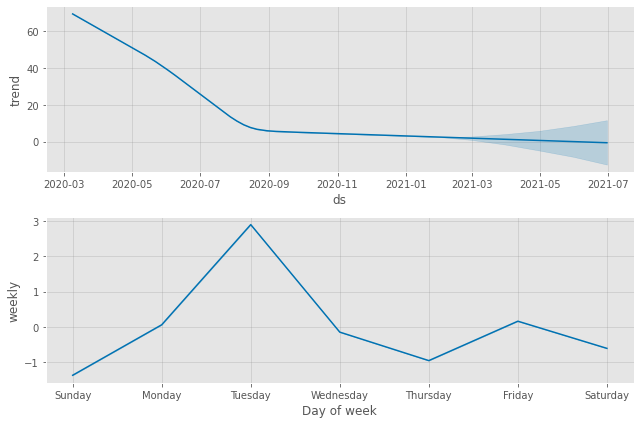

In [33]:
fig = model.plot_components(fcst)

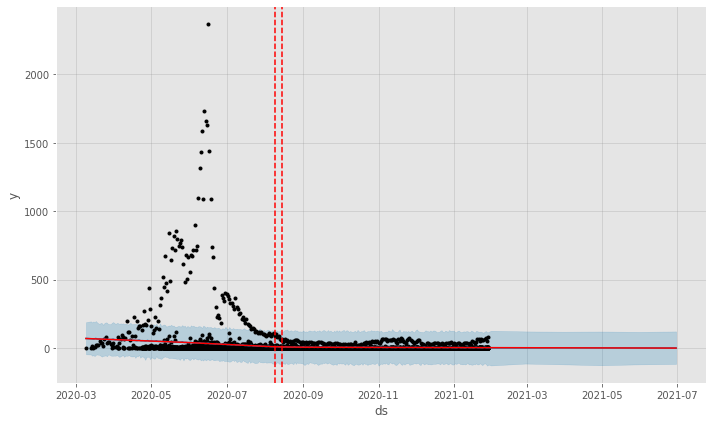

In [34]:
# the vertical lines where the potential changepoints occurred
fig = model.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), model, fcst)

In [35]:
plot_plotly(model, fcst)

# Visualizing Prophet models

### In order to build a useful dataframe to visualize our model versus our original data `Riyadh`, we need to combine the output of the Prophet model with our original data set, then we'll build a new chart manually using pandas and matplotlib.



In [36]:
# let's set the dataframe to have the same index of ds
Rregion=Rregion.rename(columns={'Date':'ds', 'Confirmed':'y'})

In [37]:
Rregion.set_index('ds', inplace=True)
fcst.set_index('ds', inplace=True)

In [38]:
# combine the original data and the forecast model data
viz_df = Rregion.join(fcst[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

### If we look at the head(), we see the data has been joined correctly but the scales of our original data (y) that confirmed cases and the model (yhat) are different. so need to rescale the yhat colums(s) to get the same scale, so we'll use numpy's exp function to do that.

In [39]:
viz_df.head()

,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,y,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Time,yhat,yhat_lower,yhat_upper
ds,,,,,,,,,,,,,,,,,,,,,,
2020-03-09,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.583712e+12,Riyadh,C531G10R01,1.0,0.0,0.0,1.0,0.0,cf1eb028-be80-401f-8a37-3ec00796fe9b,00:00:00,69.347853,-45.987145,188.692331
2020-03-13,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584058e+12,Riyadh,C531G10R01,3.0,0.0,0.0,3.0,0.0,9ffc0208-877f-4da0-9f48-f9ae39c71b46,00:00:00,68.072629,-47.528112,194.606367
2020-03-14,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584144e+12,Riyadh,C531G10R01,12.0,0.0,0.0,12.0,0.0,f5826ad2-87d9-4141-830a-91dc620b2b8b,00:00:00,66.955055,-56.458344,186.774596
2020-03-15,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584230e+12,Riyadh,C531G10R01,2.0,0.0,0.0,2.0,0.0,3c037e1f-0baa-4a98-a47f-1ce52534c7d3,00:00:00,65.844337,-52.513413,193.946342
2020-03-16,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584317e+12,Riyadh,C531G10R01,4.0,0.0,0.0,4.0,0.0,3aed2d7e-dfc2-4109-87a9-7a1b6c129bbe,00:00:00,66.937838,-59.597841,188.021808


In [40]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [41]:
viz_df.head()

,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,y,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Time,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,,,,,,,,,,,,,,,,,,,
2020-03-09,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.583712e+12,Riyadh,C531G10R01,1.0,0.0,0.0,1.0,0.0,cf1eb028-be80-401f-8a37-3ec00796fe9b,00:00:00,69.347853,-45.987145,188.692331,1.310358e+30
2020-03-13,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584058e+12,Riyadh,C531G10R01,3.0,0.0,0.0,3.0,0.0,9ffc0208-877f-4da0-9f48-f9ae39c71b46,00:00:00,68.072629,-47.528112,194.606367,3.660724e+29
2020-03-14,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584144e+12,Riyadh,C531G10R01,12.0,0.0,0.0,12.0,0.0,f5826ad2-87d9-4141-830a-91dc620b2b8b,00:00:00,66.955055,-56.458344,186.774596,1.197321e+29
2020-03-15,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584230e+12,Riyadh,C531G10R01,2.0,0.0,0.0,2.0,0.0,3c037e1f-0baa-4a98-a47f-1ce52534c7d3,00:00:00,65.844337,-52.513413,193.946342,3.943049e+28
2020-03-16,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584317e+12,Riyadh,C531G10R01,4.0,0.0,0.0,4.0,0.0,3aed2d7e-dfc2-4109-87a9-7a1b6c129bbe,00:00:00,66.937838,-59.597841,188.021808,1.176884e+29


### Let's see the confirmed `y` and `yhat_rescaled` data together in a chart

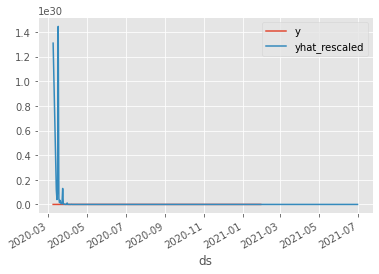

In [42]:
viz_df[['y', 'yhat_rescaled']].plot()

In [43]:
Rregion.index = pd.to_datetime(Rregion.index) #make sure our index as a datetime object
connect_date = Rregion.index[-2] #select the 2nd to last date

In [44]:
mask = (fcst.index > connect_date)
predict_df = fcst.loc[mask]

In [45]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2021-01-29,2.477905,-121.254553,116.871530,2.477905,2.477905,0.156696,0.156696,0.156696,0.156696,0.156696,0.156696,0.0,0.0,0.0,2.634600
2021-01-31,2.436912,-127.504847,125.953078,2.436912,2.436912,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,0.0,0.0,0.0,1.053892
2021-02-28,1.863021,-113.828077,121.066078,0.968618,2.713327,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,-1.383020,0.0,0.0,0.0,0.480000
2021-03-31,1.227641,-119.599158,118.836470,-1.611886,4.057329,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,0.0,0.0,0.0,1.073497
2021-04-30,0.612757,-125.978038,120.357664,-4.807280,5.793617,0.156696,0.156696,0.156696,0.156696,0.156696,0.156696,0.0,0.0,0.0,0.769452


In [46]:
viz_df = Rregion.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [47]:
viz_df.head()

,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,y,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Time,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,,,,,,,,,,,,,,,,,,,
2020-03-09,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.583712e+12,Riyadh,C531G10R01,1.0,0.0,0.0,1.0,0.0,cf1eb028-be80-401f-8a37-3ec00796fe9b,00:00:00,NaN,NaN,NaN,NaN
2020-03-13,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584058e+12,Riyadh,C531G10R01,3.0,0.0,0.0,3.0,0.0,9ffc0208-877f-4da0-9f48-f9ae39c71b46,00:00:00,NaN,NaN,NaN,NaN
2020-03-14,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584144e+12,Riyadh,C531G10R01,12.0,0.0,0.0,12.0,0.0,f5826ad2-87d9-4141-830a-91dc620b2b8b,00:00:00,NaN,NaN,NaN,NaN
2020-03-15,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584230e+12,Riyadh,C531G10R01,2.0,0.0,0.0,2.0,0.0,3c037e1f-0baa-4a98-a47f-1ce52534c7d3,00:00:00,NaN,NaN,NaN,NaN
2020-03-16,AR RIYAD,Ar Riyad,Ar Riyad,C531G10R01,R01,G10R01,City,GCS,296ee29a-b190-4064-a3c5-cdd778046ab2,1.584317e+12,Riyadh,C531G10R01,4.0,0.0,0.0,4.0,0.0,3aed2d7e-dfc2-4109-87a9-7a1b6c129bbe,00:00:00,NaN,NaN,NaN,NaN


In [48]:
viz_df.tail()

,PlaceName_EN,GovernorateName_EN,RegionName_EN,PLC_CODE,REG_CODE,GOV_CODE,Place_Category,DataSource,GlobalID,Reportdt,Name_Eng,Place_Code,y,Deaths,Recovered,Tested,NewAdded,GlobalID_1587594607483,Time,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,,,,,,,,,,,,,,,,,,,
2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,-113.828077,121.066078,1.616075
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.073497,-119.599158,118.836470,2.925594
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769452,-125.978038,120.357664,2.158584
2021-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032145,-119.638334,117.704966,1.032667
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.791651,-116.543805,120.972401,0.453096


Text(0.5, 0, 'Date')

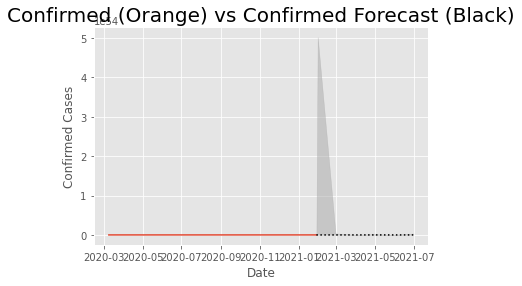

In [49]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.y)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Confirmed (Orange) vs Confirmed Forecast (Black)',fontsize=20)
ax1.set_ylabel('Confirmed Cases')
ax1.set_xlabel('Date')

In [50]:
future.tail()

,ds
325,2021-02-28
326,2021-03-31
327,2021-04-30
328,2021-05-31
329,2021-06-30


In [51]:
fcst.sample(3)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-03-25,63.784479,-53.887047,187.236536,63.784479,63.784479,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,0.0,0.0,0.0,63.630336
2020-12-25,3.195269,-113.391032,126.850652,3.195269,3.195269,0.156696,0.156696,0.156696,0.156696,0.156696,0.156696,0.0,0.0,0.0,3.351965
2020-10-28,4.384162,-115.897464,127.244578,4.384162,4.384162,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,-0.154143,0.0,0.0,0.0,4.230019


# Model Evaluation
 
 - initial: how much data to consider before making any predictions
 - period: how frequently to make predictions
    - should be about 1/2 of your horizon
 - horizon: how many periods to predict
    - should be about 2x your period

In [52]:
# Cross validation the forecast
cross_validation(model,initial='40 days', period='50 days', horizon='100 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-05-14 00:00:00 and 2020-10-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-15,67.289033,-66.301016,204.053811,89,2020-05-14
1,2020-05-15,67.289033,-62.657327,196.660434,1,2020-05-14
2,2020-05-15,67.289033,-56.215413,197.308648,1,2020-05-14
3,2020-05-15,67.289033,-78.454109,196.385312,4,2020-05-14
4,2020-05-15,67.289033,-59.887424,205.396481,7,2020-05-14
...,...,...,...,...,...,...
9110,2021-01-29,-25.656194,-165.578835,105.121273,77,2020-10-21
9111,2021-01-29,-25.656194,-177.327616,120.200381,1,2020-10-21
9112,2021-01-29,-25.656194,-160.277978,105.707116,0,2020-10-21
9113,2021-01-29,-25.656194,-173.884488,132.626406,1,2020-10-21


In [53]:
df_cv2 = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-02 00:00:00 and 2020-08-02 00:00:00


In [54]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv2)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,12 days,339.287838,18.419768,7.836533,0.878620,1.0
1,13 days,315.942473,17.774771,7.293336,0.944144,1.0
2,14 days,289.437081,17.012850,6.983832,1.065947,1.0
3,15 days,268.752247,16.393665,6.760550,1.269783,1.0
4,16 days,248.434563,15.761807,6.596205,1.355199,1.0


In [55]:
df_p.tail()

,horizon,mse,rmse,mae,mdape,coverage
164,176 days,8952.938576,94.619969,93.836803,93.24636,1.0
165,177 days,9010.208159,94.922116,94.098444,93.24636,1.0
166,178 days,9127.287961,95.536841,94.639584,93.24636,1.0
167,179 days,9291.961957,96.394823,95.478227,93.24636,1.0
168,180 days,9461.696977,97.271255,96.290906,93.24636,1.0


# Visualize Cross Validation

In [56]:
# fig = plot_cross_validation_metric(df_cv2, metric='mape')
# 'NoneType' object is not subscriptable 

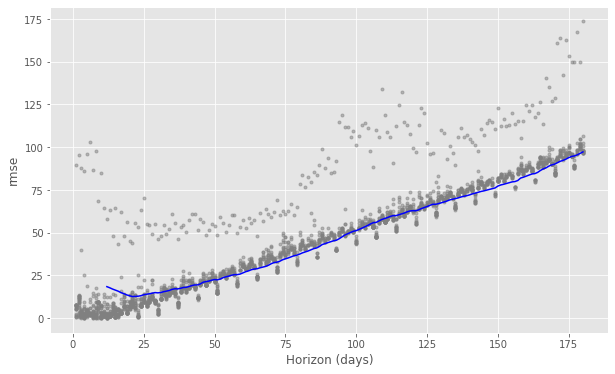

In [57]:
fig1 = plot_cross_validation_metric(df_cv2, metric='rmse', rolling_window = 0.1);

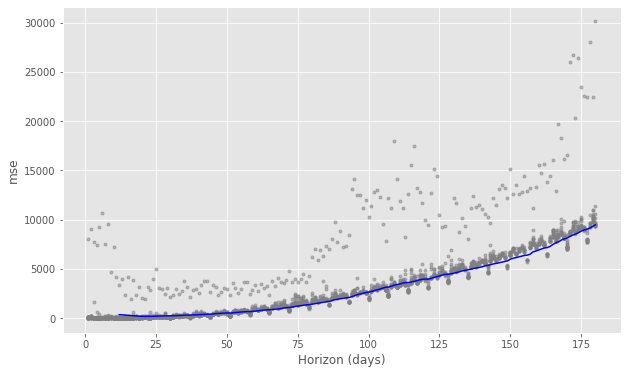

In [58]:
fig2 = plot_cross_validation_metric(df_cv2, metric='mse', rolling_window = 0.1);

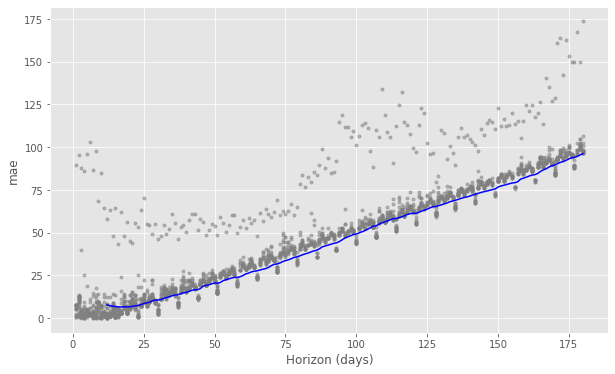

In [59]:
fig3 = plot_cross_validation_metric(df_cv2, metric='mae', rolling_window = 0.1);

#Save Cleaned Data and Download it
### Use pickle to save the Prophet model after fitting

In [60]:
import pickle

pkl_path = "Prophet.pkl" # saved into /content/Prophet.pkl
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(model, f)

# save the dataframe
fcst.to_pickle("forecast.pkl") # saved into /content/forecast.pkl
print("*** Data Saved ***") # we can find the files in the data 'Files'

*** Data Saved ***
